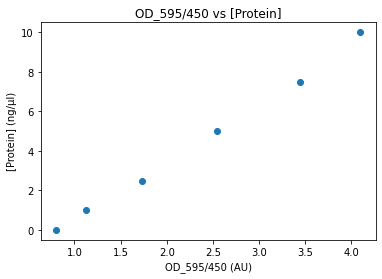

In [27]:
import matplotlib.pyplot as plt

spect = [0.80, 1.12, 1.73, 2.54, 3.45, 4.10]
protein = [0, 1, 2.5, 5, 7.5, 10]

plt.scatter(spect, protein)
plt.title('OD_595/450 vs [Protein]')
plt.xlabel('OD_595/450 (AU)')
plt.ylabel('[Protein] (ng/µl)')
plt.show()

(0.8, 0)  -  (1.12, 1)  -->  3.1249999999999996x + -2.5
(0.8, 0)  -  (1.73, 2.5)  -->  2.688172043010753x + -2.1505376344086025
(0.8, 0)  -  (2.54, 5)  -->  2.8735632183908044x + -2.2988505747126435
(0.8, 0)  -  (3.45, 7.5)  -->  2.830188679245283x + -2.2641509433962264
(0.8, 0)  -  (4.1, 10)  -->  3.0303030303030303x + -2.4242424242424243
(1.12, 1)  -  (1.73, 2.5)  -->  2.4590163934426235x + -1.7540983606557385
(1.12, 1)  -  (2.54, 5)  -->  2.8169014084507045x + -2.1549295774647894
(1.12, 1)  -  (3.45, 7.5)  -->  2.7896995708154506x + -2.124463519313305
(1.12, 1)  -  (4.1, 10)  -->  3.0201342281879198x + -2.3825503355704702
(1.73, 2.5)  -  (2.54, 5)  -->  3.0864197530864197x + -2.8395061728395063
(1.73, 2.5)  -  (3.45, 7.5)  -->  2.9069767441860463x + -2.52906976744186
(1.73, 2.5)  -  (4.1, 10)  -->  3.164556962025317x + -2.974683544303798
(2.54, 5)  -  (3.45, 7.5)  -->  2.747252747252747x + -1.9780219780219772
(2.54, 5)  -  (4.1, 10)  -->  3.2051282051282057x + -3.1410256410256423
(3

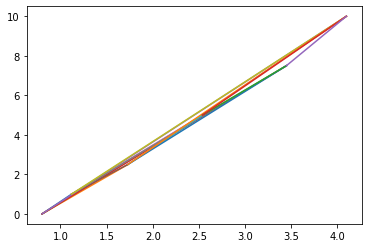

In [28]:
from statistics import mean

brStd = list(zip(spect, protein))
aa = []
bb = []
for i in range(len(brStd)):
    for j in range(i+1, len(brStd)):
        aij = (brStd[j][1] - brStd[i][1]) / (brStd[j][0] - brStd[i][0])
        bij = brStd[i][1] - aij * brStd[i][0]
        aa.append(aij)
        bb.append(bij)
        plt.plot((brStd[i][0], brStd[j][0]), (brStd[i][1], brStd[j][1]))
        print('{0}  -  {1}  -->  {2}x + {3}'.format(brStd[i], brStd[j], aij, bij))
print(mean(aa))
print(mean(bb))
plt.show()

[[0.         3.125      2.68817204 2.87356322 2.83018868 3.03030303]
 [3.125      0.         2.45901639 2.81690141 2.78969957 3.02013423]
 [2.68817204 2.45901639 0.         3.08641975 2.90697674 3.16455696]
 [2.87356322 2.81690141 3.08641975 0.         2.74725275 3.20512821]
 [2.83018868 2.78969957 2.90697674 2.74725275 0.         3.84615385]
 [3.03030303 3.02013423 3.16455696 3.20512821 3.84615385 0.        ]]
[[ 0.         -2.5        -2.15053763 -2.29885057 -2.26415094 -2.42424242]
 [-2.5         0.         -1.75409836 -2.15492958 -2.12446352 -2.38255034]
 [-2.15053763 -1.75409836  0.         -2.83950617 -2.52906977 -2.97468354]
 [-2.29885057 -2.15492958 -2.83950617  0.         -1.97802198 -3.14102564]
 [-2.26415094 -2.12446352 -2.52906977 -1.97802198  0.         -5.76923077]
 [-2.42424242 -2.38255034 -2.97468354 -3.14102564 -5.76923077  0.        ]]


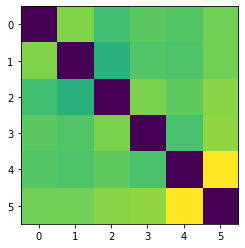

In [29]:
from scipy.spatial.distance import squareform

asq = squareform(aa)
print(asq)
bsq = squareform(bb)
print(bsq)

plt.imshow(asq)

0.02449227964672768
0.029449110183502585
0.002402040585417865
0.006968005250820752
0.013882253969927563
0.04384027995749018


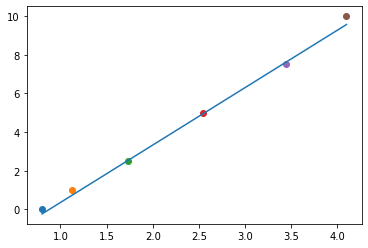

In [30]:
a = mean(aa)
b = mean(bb)
x1 = min(spect)
y1 = a * x1 + b
x2 = max(spect)
y2 = a * x2 + b
plt.plot((x1, x2), (y1, y2))
for i in brStd:
    d = abs(-a * i[0] + i[1] - b) / (a * a + 1)
    plt.scatter(i[0], i[1])
    print(d)
plt.show()

In [34]:
# R^2 value
ymean = mean(protein)
SSres = 0.0 # Residual squared errors of the regression model 
SStot = 0.0 # Total errors of the regression model
for i in brStd:
    SSres = SSres + (i[1] - a*i[0] - b)**2
    SStot = SStot + (i[1] - ymean)**2
Rsq = 1 - SSres / SStot
print(Rsq)

0.9953605784894998
